In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from itertools import chain

In [2]:
update_nums = [1, 2, 3]
update_formats = ['per', 'num', 'rate']

# 1: [[1,2,3],[1,3,2],[1,3,2],[3,1,2],[3,1,2]],
# 2: [[3,1,2],[1,3,2],[3,1,2],[1,2,3],[3,2,1]],
# 3: [[1,3,2],[3,1,2],[3,2,1],[2,3,1],[3,2,1]]

per_updates = { 1: [[25,31,44],[13,62,25],[17,50,33],[55,21,23],[55,19,24]], 
                2: [[44,25,31],[13,62,25],[50,17,33],[21,23,55],[55,24,19]],
                3: [[25,44,31],[62,13,25],[50,33,17],[23,55,21],[55,24,19]],
              }

num_updates = { 1: [[8,16,33],[13,62,25],[67,327,121],[32,18,31],[17,4,11]], 
                2: [[33,8,16],[13,62,25],[327,67,121],[18,31,32],[17,11,4]], 
                3: [[8,33,16],[62,13,25],[327,121,67],[31,32,18],[17,11,4]]
              }

rate_updates = { 1: [[8,10,16],[14,41,21],[57,173,154],[75,21,67],[151,58,72]], 
                 2: [[16,8,10],[14,41,21],[173,57,154],[21,67,75],[151,72,58]], 
                 3: [[8,16,10],[41,14,21],[173,154,57],[67,75,21],[151,72,58]]
               }

In [3]:
which_safest = ["Blicket", "Dax", "Wug"]
columns_safest = { 'Blicket': ["Blicket", "Dax", "Wug"], 
                   'Dax': ["Dax", "Wug", "Blicket"], 
                   'Wug': ["Wug", "Blicket", "Dax"]
                 }

In [4]:
rows_format = { 'per': ["% occupant death due to a vehicle rollover caused by right turn", "% occupant deaths due to rollover crashes in ice/ frost condition on road", "% occupant death in rollover crashes in blowing snow atmospheric conditions", "% of occupant deaths in single vehicle crashes", "% of occupant deaths in 2019"][::-1], 
                'num': ["# of Drivers killed on colliding with crash cushions", "# of Drivers killed in crashes in rural areas in 2019", "# of Drivers killed on collision with concrete barrier", "# of Drivers killed in rollover crashes with no initial impact", "# of Drivers killed on collision with utility pole"][::-1], 
                'rate': ["Driver death rate* for crashes involving very large sized vehicles", "Driver death rate* for multi-vehicle crashes involving small size vehicles", "Driver death rate* for crashes involving young drivers (age 15 - 20)", "Driver death rate* on collision with tree", "Driver death rate* for crashes involving alcohol impaired drivers"][::-1]
              }
#footnote for rate
footer='*Driver death rate is defined as deaths per million registered vehicle'

In [5]:
def create_fig(update, row_labels, col_labels, title, footer): 
    #split update into 5 lists
    y1 = update[0][:]
    y2 = update[1][:]
    y3 = update[2][:]
    y4 = update[3][:]
    y5 = update[4][:]

    x= np.arange(len(col_labels))
    width = 0.3
    
    #plot 5 subplots
    fig = plt.figure(figsize=(15,6))
    fig.set_figwidth(8)
    ax = {}
    for i in range(5):
        ax[i] = plt.subplot(510+i+1)
        
    # to set the same ylim for all find the lowest and highest value in update
    ymin = 0
    ymax = max(list(chain.from_iterable(update)))*1.5
    
    #inserting newline in a string
    def insert_newlines(string, every=32):
        if string!= None: 
            lines = []
            for i in range(0, len(string), every):
                lines.append(string[i:i+every])
            return '-\n-'.join(lines)



    #1st plot
    ax[0].bar(x,y1,width)
    ax[0].set_ylabel(insert_newlines(row_labels[0]), rotation=0, labelpad=200, fontsize=11, horizontalalignment='left')
    ax[0].set_xticks([])
    ax[0].set_ylim(ymin,ymax)
    #adding data labels on top of bar
    rects = ax[0].patches
    for rect, label in zip(rects, y1):
        height = rect.get_height()
        ax[0].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
    
    
    #2nd
    ax[1].bar(x,y2,width)
    ax[1].set_ylabel(insert_newlines(row_labels[1]),rotation=0, labelpad=200, fontsize=11, horizontalalignment='left')
    ax[1].set_xticks([])
    ax[1].set_ylim(ymin,ymax)
    #adding data labels on top of bar
    rects = ax[1].patches
    for rect, label in zip(rects, y2):
        height = rect.get_height()
        ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
        
    #3rd
    ax[2].bar(x,y3,width)
    ax[2].set_ylabel(insert_newlines(row_labels[2]),rotation=0, labelpad=200, fontsize=11, horizontalalignment='left')
    ax[2].set_xticks([])
    ax[2].set_ylim(ymin,ymax)
    #adding data labels on top of bar
    rects = ax[2].patches
    for rect, label in zip(rects, y3):
        height = rect.get_height()
        ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
    
    #4th
    ax[3].bar(x,y4,width)
    ax[3].set_ylabel(insert_newlines(row_labels[3]),rotation=0, labelpad=200, fontsize=11,horizontalalignment='left')
    ax[3].set_xticks([])
    ax[3].set_ylim(ymin,ymax)
    #adding data labels on top of bar
    rects = ax[3].patches
    for rect, label in zip(rects, y4):
        height = rect.get_height()
        ax[3].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
    
    #5th
    ax[4].bar(x,y5,width)
    ax[4].set_ylabel(insert_newlines(row_labels[4]),rotation=0, labelpad=200, fontsize=11,horizontalalignment='left')
    ax[4].set_xticks(range(len(col_labels)))
    ax[4].set_xticklabels(col_labels, fontsize=14)
    ax[4].set_ylim(ymin,ymax)
    #adding data labels on top of bar
    rects = ax[4].patches
    for rect, label in zip(rects, y5):
        height = rect.get_height()
        ax[4].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
 
    # Add footer for rate data only
    plt.figtext(0, 0, footer, horizontalalignment='left', size=8, weight='light')
 
    # plt.suptitle(title, fontsize=20)
    fig.align_labels()
    plt.tight_layout() 
    plt.savefig(f'charts/{title}.png',pad_inches=1)
    plt.show()
    plt.close()


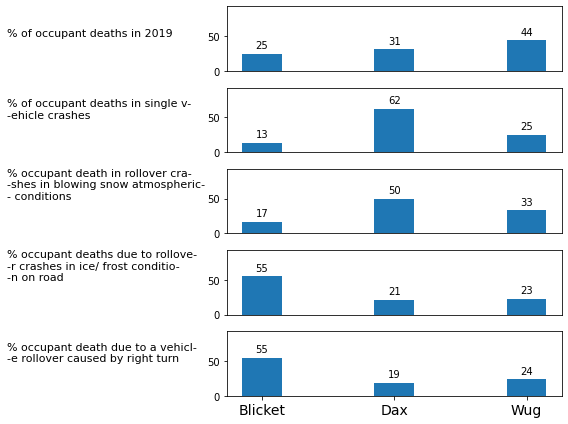

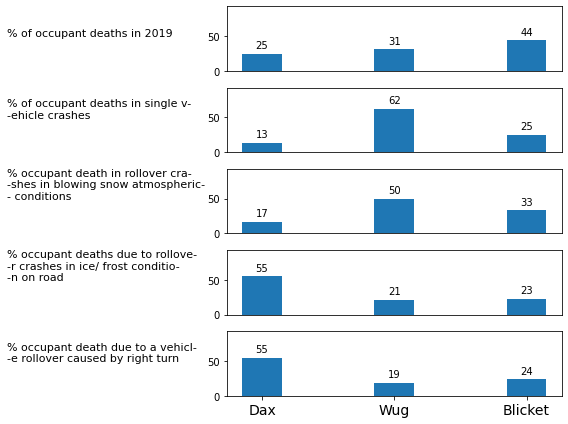

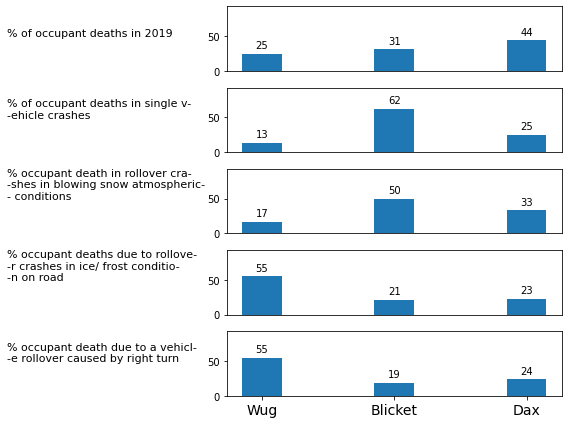

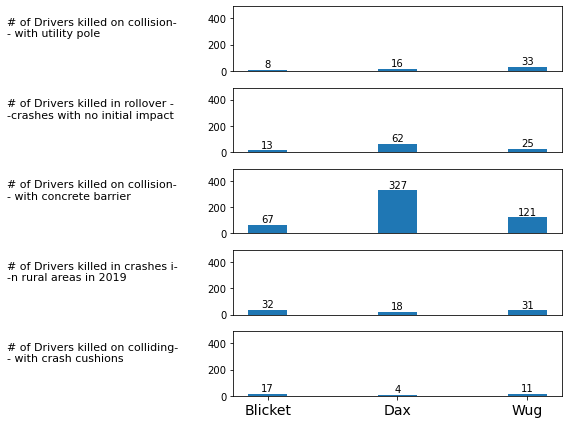

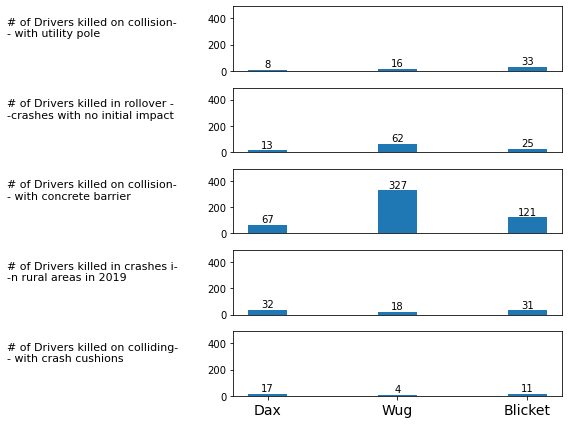

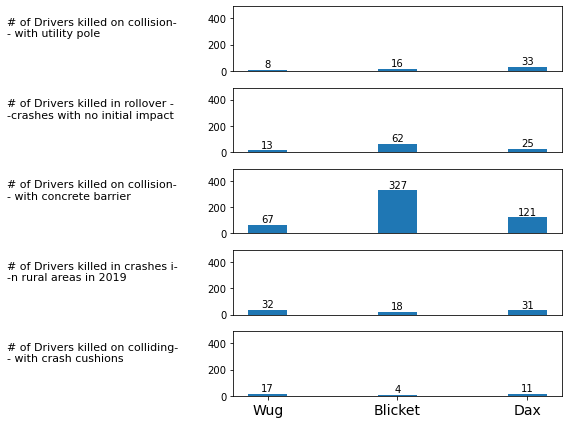

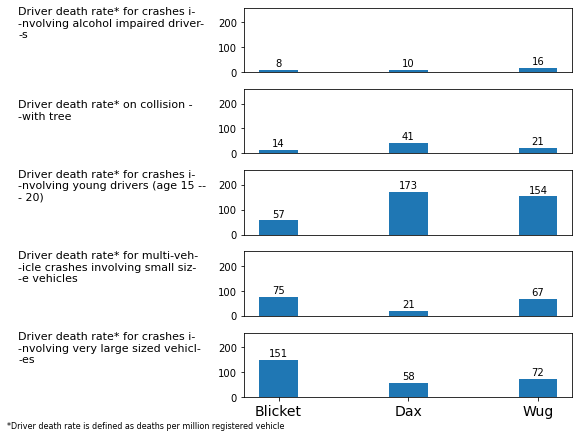

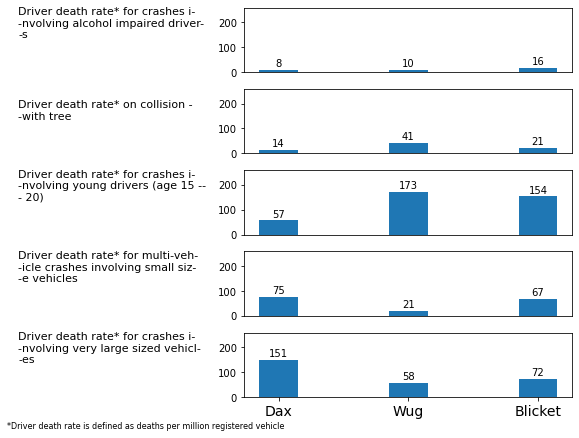

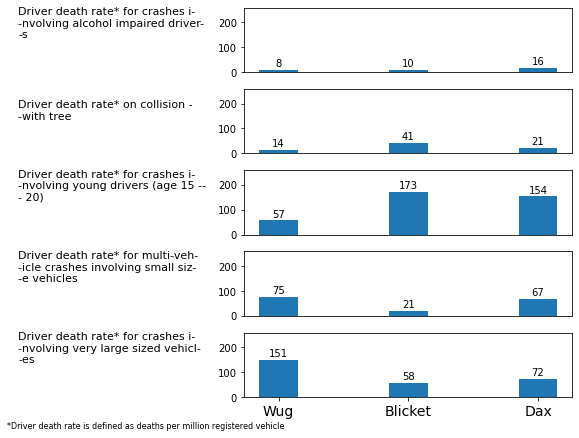

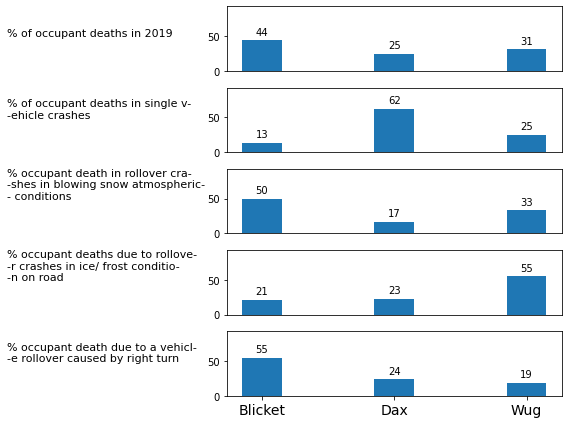

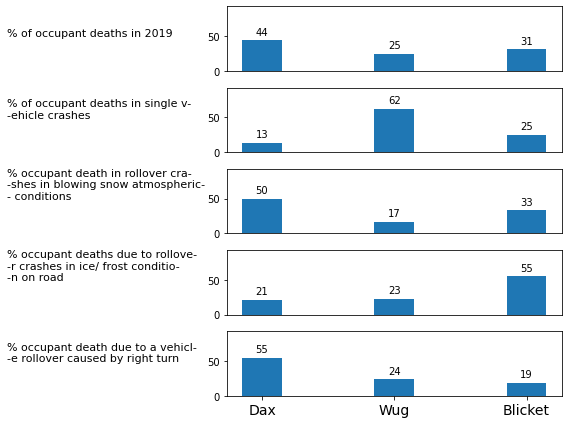

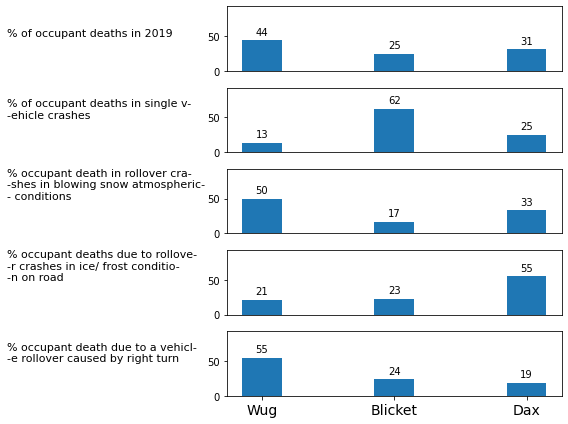

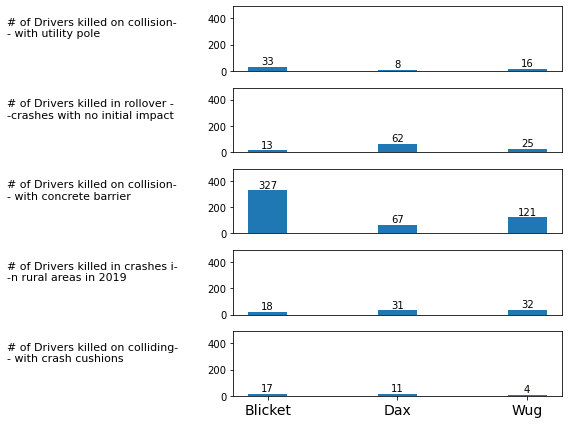

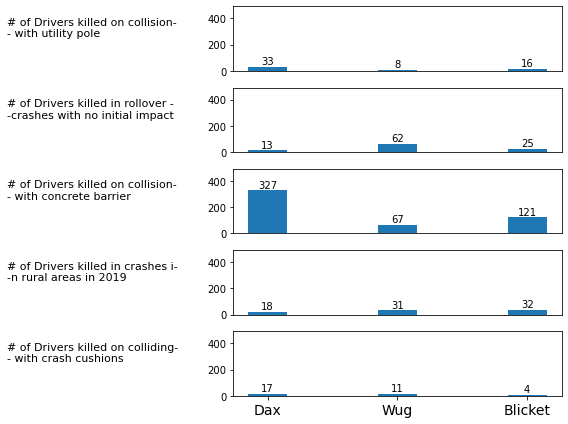

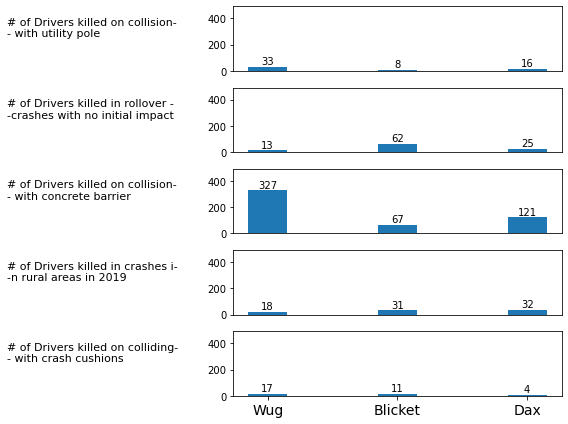

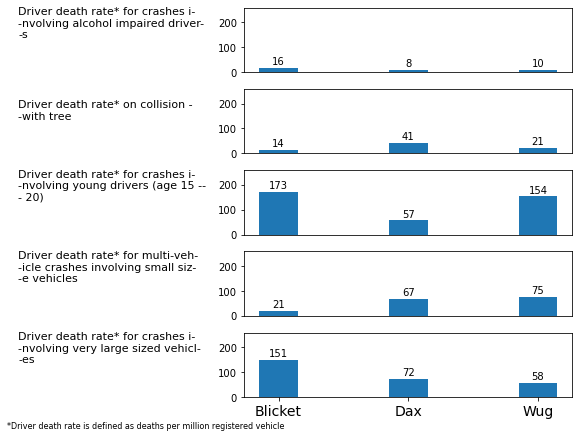

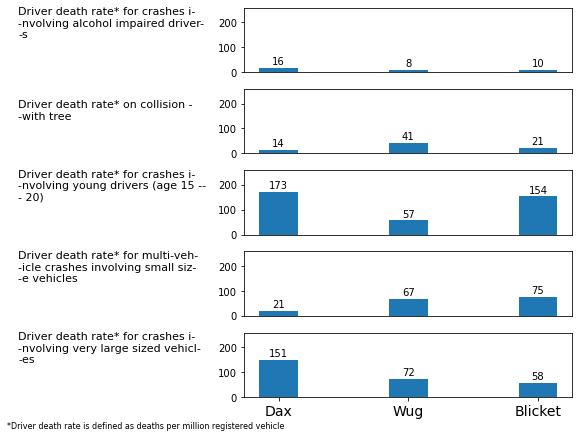

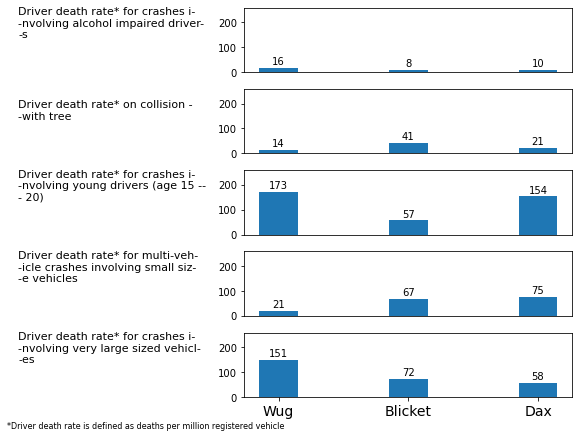

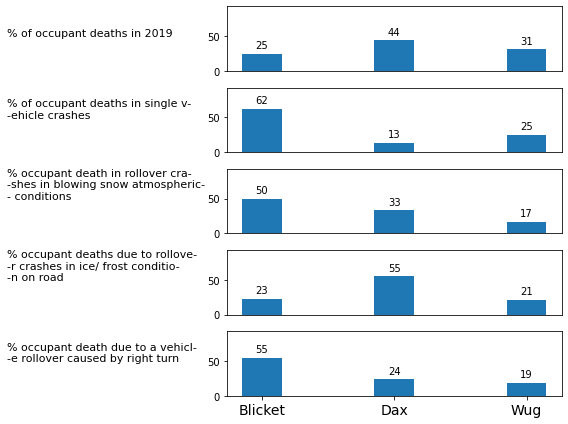

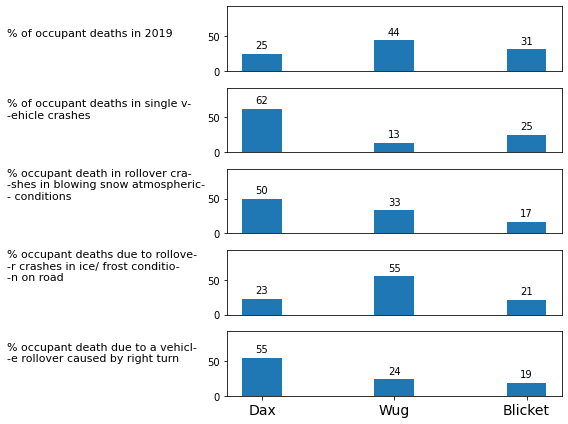

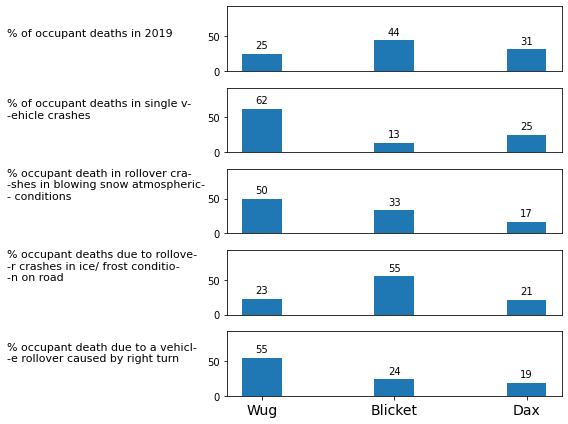

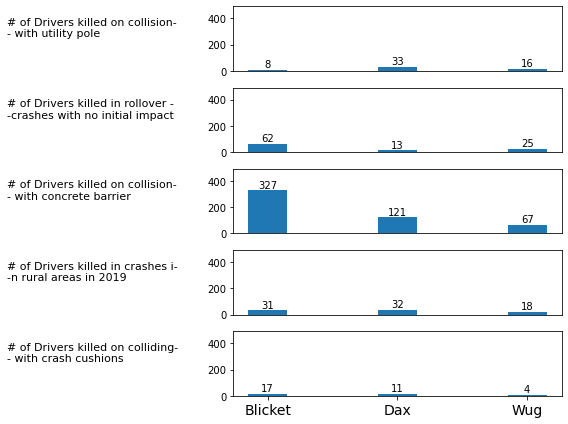

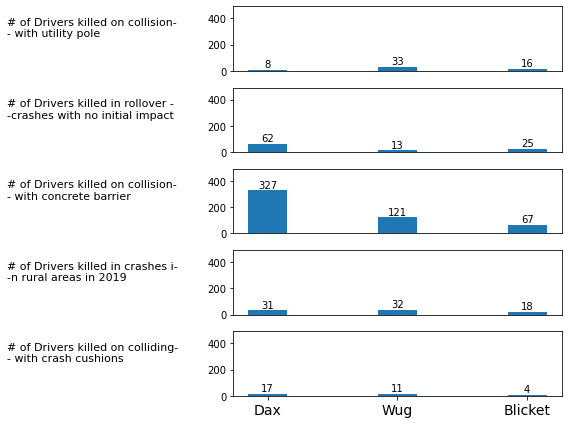

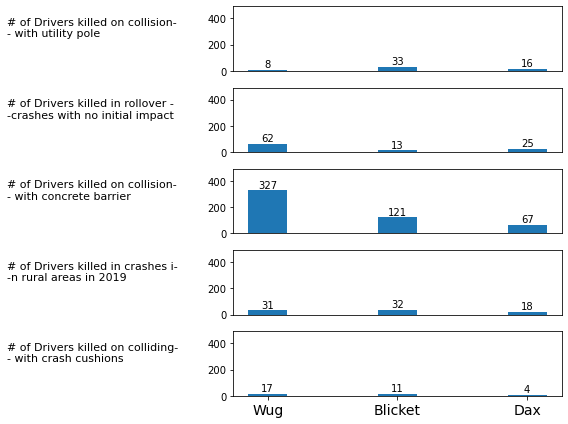

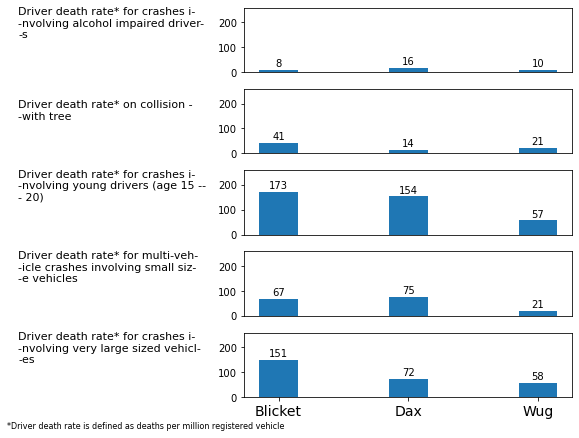

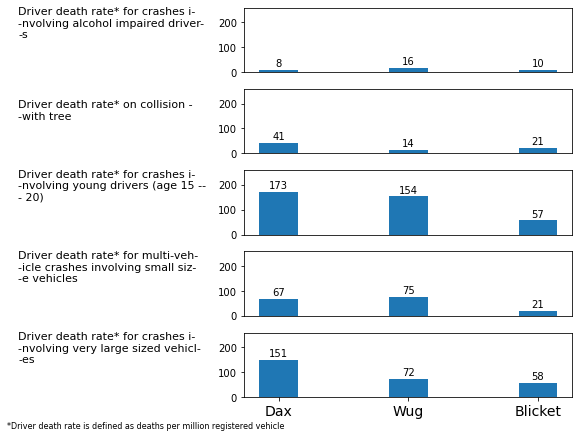

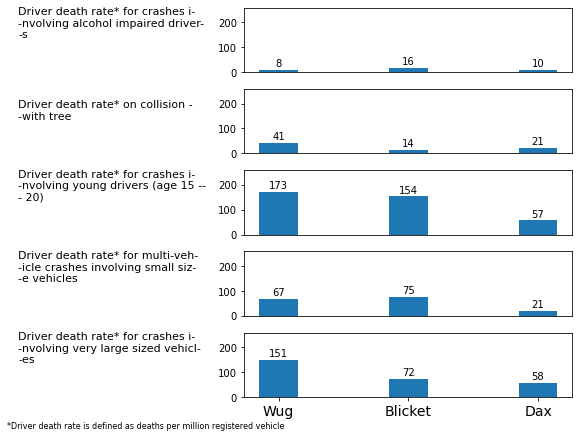

In [6]:
for num in update_nums: # produce table for update 1, 2, 3
    for update_format in update_formats: # for each update, vary by format
        if (update_format == 'per'): 
            updates = per_updates[num]
            footnote = None
        elif (update_format == 'num'):
            updates = num_updates[num]
            footnote = None
        elif (update_format == 'rate'):
            updates = rate_updates[num]
            footnote = footer
            
        for safest in which_safest: # for each update and format, vary which car is safest
            columns = columns_safest[safest]
            rows = rows_format[update_format]

            create_fig(updates, rows, columns, safest + '_' + str(num) + '_' + update_format, footnote)

##### 